<a href="https://colab.research.google.com/github/tianhaoqiu/BIMM-143/blob/master/Copy_of_QBC_Day_1_Data_Analysis_and_Statistics_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuroscience Bootcamp: Data Analysis and Basic Statistics 

## Introduction to Python 

This Google CoLab Notebook runs code in Python.  You will learn to call Python functions to explore real and simulated data, and write small blocks of code to examine data and perform some basic statistical calculations.

Python is a free open-source programming language that facilitates quantitative analysis of data.

If you are unfamilar with Python or with programming in general, here are some resources:
- [Software Carpentry 1-day Python tutorial](https://swcarpentry.github.io/python-novice-inflammation/)
- [Free Edx course Using Python for Research](https://www.edx.org/course/using-python-for-research)
- [SciPy lexture notes  ( more in-depth intro)](https://scipy-lectures.org/)
- [Python Data Science Handbook ](https://jakevdp.github.io/PythonDataScienceHandbook/)

Within Python, we will use built-in functions from several packages, called NumPy, Matplotlib, Seaborn, and Pandas.  These must be imported at the start of each CoLab Notebook session.  You do this by running the first code cell, called "Import Packages".  Once you have done this, these packages are available for you to use in subsequent code cells.

For documentation on specific functions, just google "function_name Python" or "function_name Seaborn" etc.  This will give a full description and examples.

To run a code cell, either click the arrow button, or use Ctrl-Enter (PC) or Cmd-Enter (Mac).

**For Matlab programmers.**  You might be interested in the following [cheat sheet](https://cheatsheets.quantecon.org/) that compares Matlab syntax to Python syntax, or the book _[Neural Data Science](https://www.worldcat.org/title/neural-data-science-a-primer-with-matlab-and-python/oclc/973932708)_ with both Matlab and Python versions.

In [ ]:
#@title Import Packages -- RUN THIS CELL!
import numpy as np 
import seaborn as sns # seaborn - easy plotting for statistical visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.random as npr
import pandas as pd
from scipy import stats

## EXERCISE 1. Loading Data and Making Histograms

**Goals:** Load data from an external file.  Build histograms to examine the data distribution.  When is a histogram well-sampled?  




### EPSC Data in Autism Mutant and Wild Type Mice

Let's consider data from an electrophysiology paper that explored differences in  excitatory and inhibitory synapse function in transgenic mouse models of Autism Spectrum Disorder (ASD). Excitatory postsynaptic currents (EPSCs) were measured in L2/3 pyramidal neurons in mouse somatosensory cortex (S1) between ASD mutant mice and wild type mice.  The question was whether EPSC properties differed between mutant and wild type mice. This figure shows an example from the _Fragile X mental retardation 1_ (_Fmr1_) mouse model. (from _Antoine et al., Neuron 101, 648-661, 2019_). 

<img src='https://drive.google.com/uc?id=1il2N66383hqav3YFFOywNljyMAu4naZt'>


You will examine small example datasets that are stored in a [GitHub Respsository](https://kinsta.com/knowledgebase/what-is-github/). The data is organized into 2 columns containing evoked excitatory current amplitudes (pA) from L2/3 PYR cells of wildtype (wt) and mutant mice. There are 4 data files with different sample sizes (N):
- [`EPSC_N20.csv`](https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N20.csv)
- [`EPSC_N20_1.csv`](https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N20_1.csv)
- [`EPSC_N100.csv`](https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N100.csv)
- [`EPSC_N1000.csv`](https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N1000.csv)
You can copy the link to the url embedded for each of these fies.  See below how to use this url to read the file contents as a [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). 




###**How to load an external datafile**.  
Use the pd.read_csv function, with an argument that contains the link to needed datafile on the GitHub repository.  For example, to load the N100 data, use the following code:

url = 'https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N100.csv'

df_currents = pd.read_csv(url, usecols = ['Wild Type', 'Mutant'])

print (df_currents)  # shows you the contents

This reads the data into a table-like structure called a **dataframe**.  Each column has a label ('Wild Type' or 'Mutant') and represents one group within the dataset.  The usecols flag means read only these two columns from the csv file.

In [ ]:
# EXERCISE:  Read the N=20 data set and then use the print() command to display it as text.
# 
df_N20 = pd.read_csv('https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N20.csv', usecols = ['Wild Type', 'Mutant'])
print(df_N20)

     Wild Type      Mutant
0   215.560449   87.146396
1   248.348583  173.873240
2   184.973681  112.657703
3   291.651134  122.846754
4   123.685875  221.096209
5   262.004281  154.806116
6   153.297330   72.385898
7   269.254598   22.634686
8   189.016995   87.454602
9   169.100964  121.284344
10  290.536426  138.611572
11  183.643235  113.646482
12  209.191345  127.131555
13  182.811041   61.067104
14  224.512981   54.524807
15  137.999917  121.471828
16  196.350402  188.236171
17  186.631604  152.100639
18  247.445156  153.439739
19  218.220121  184.184389


##EXERCISE:  
1.  Generate a rug plot of all data points in N=20 dataset.  Use sns.rugplot(). Label the axis "EPSC amplitude (pA)".  Use plt.xlabel().

2. Generate a histogram of EPSC amplitudes for both mutant and wild type, using a bin width of 10 pA.   Use sns.displot().

3. Generate another histogram of the same data, using a bin width of 50 pA. 


- _Documentation_: [`sns.displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) [`sns.rugplot`](https://seaborn.pydata.org/generated/seaborn.rugplot.html)

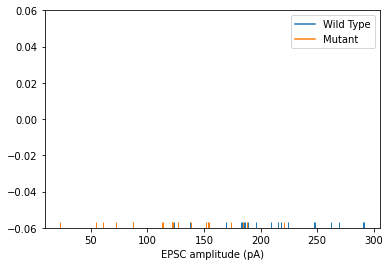

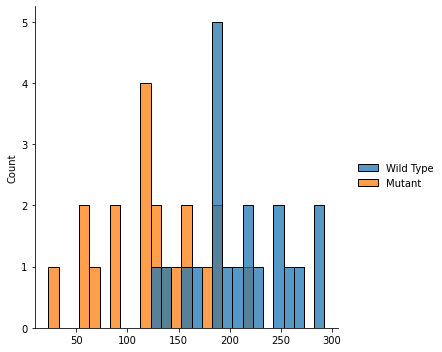

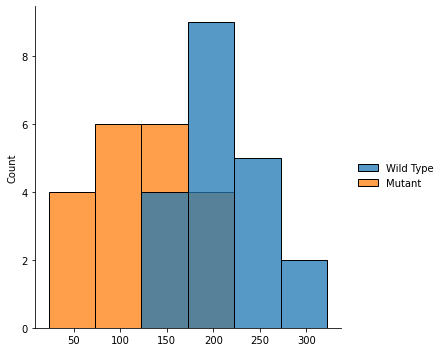

In [ ]:
## Plot a rugplot in the space below  
N20_rugplot = sns.rugplot(data = df_N20)
plt.xlabel('EPSC amplitude (pA)')
N20_his = sns.displot(data = df_N20, binwidth = 10)
N20_his_b50 = sns.displot(data = df_N20, binwidth = 50)

Text(0.5, 6.79999999999999, 'EPSC amplitude (pA)')

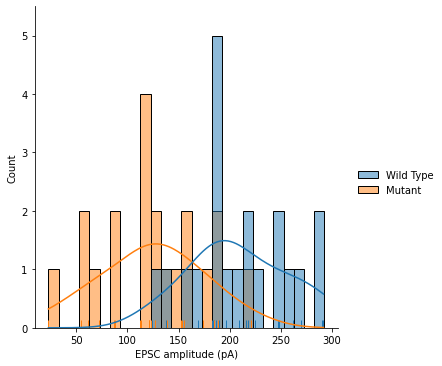

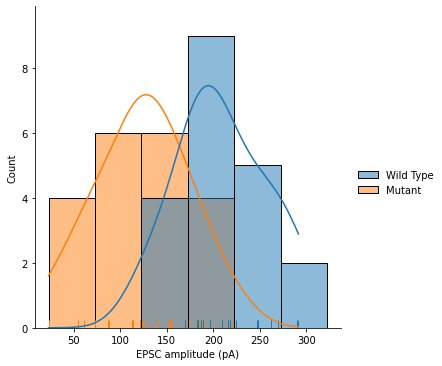

In [ ]:
## Plot a Histogram with binwidth = 10 pA.  Overlay the rugplot and the smoothed PDF using the 'rug' and 'kde' options.  
N20_his = sns.displot(data = df_N20, binwidth = 10, kde = 'True', rug = 'true')
plt.xlabel('EPSC amplitude (pA)')

## Now, plot another histogram with binwidth = 50 pA
N20_his_50 = sns.displot(data = df_N20, binwidth = 50, kde = 'True', rug = 'true')
plt.xlabel('EPSC amplitude (pA)')


##QUESTION.
Are the histograms you generated well-sampled--i.e. does the bin-to-bin shape accurately reflect the general data distribution, or is it noisy?  To assess this, load the data for the 2nd N=20 dataset (N=20_1).  Plot with the two bin sizes.  **Which bin size gives a more reliable histogram?**



     Wild Type      Mutant
0   179.689704  218.256697
1   119.813207   40.377731
2   213.056067  180.889110
3   205.280843   79.704762
4   170.593194  131.744108
5   191.520236   34.660914
6   312.639174   86.425271
7   252.765255  128.877237
8   127.549350  177.447565
9   210.286102  103.800288
10  240.971514   56.566556
11  112.380932  148.478961
12  184.002391  116.607389
13  247.848183  184.836673
14  185.610471  154.670636
15  164.508591  139.035917
16  262.055008   96.479368
17   97.980812  181.106569
18  139.621625   81.227356
19  188.248831   71.565016
Larger bin size seems to give a more reliable histogram


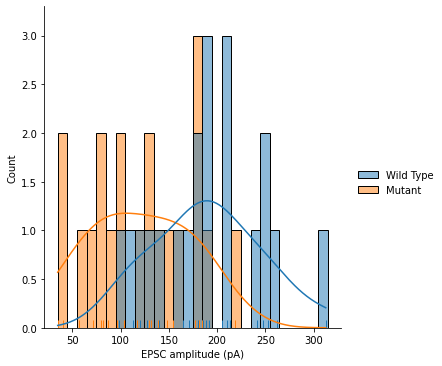

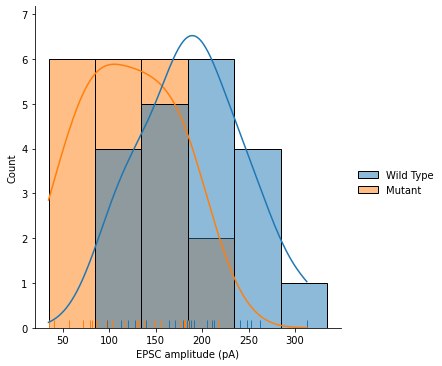

In [ ]:
# Load the N=20_1 data.  Plot it using the 2 bins sizes.
df_N20_1 = pd.read_csv('https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N20_1.csv', usecols = ['Wild Type', 'Mutant'])
print(df_N20_1)

N20_his_1 = sns.displot(data = df_N20_1, binwidth = 10, kde = 'True', rug = 'true')
plt.xlabel('EPSC amplitude (pA)')

## Now, plot another histogram with binwidth = 50 pA
N20_his_50_1 = sns.displot(data = df_N20_1, binwidth = 50, kde = 'True', rug = 'true')
plt.xlabel('EPSC amplitude (pA)')

# Which bin size seems to give a more reliable histogram?
print('Larger bin size seems to give a more reliable histogram')

Check your conclusion by loading in one of the larger datasets (N=100 and N=1000, these are simulated data drawn from the same distribution as the N=20 datasets.)  Plot the histograms again with the two bin sizes.

     Wild Type      Mutant
0   175.357363  127.610565
1   196.278989  179.052223
2   164.369393   96.372975
3   223.306643  191.659574
4   138.495378  153.670056
..         ...         ...
95  231.934820  112.694560
96  223.575016  189.065502
97  188.113572   92.191901
98  308.265113   87.108097
99  248.479788  131.660221

[100 rows x 2 columns]


Text(0.5, 6.79999999999999, 'EPSC amplitude (pA)')

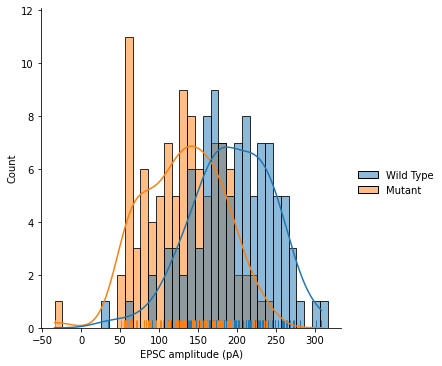

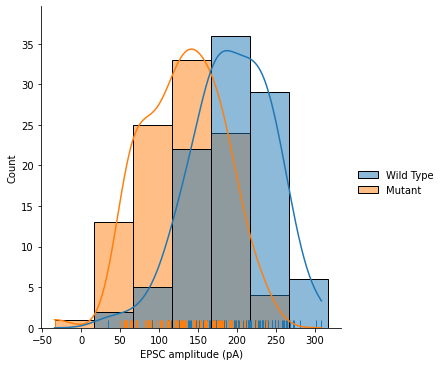

In [ ]:
# Load one of the larger datasets (N=100 or N=1000).  
df_N100 = pd.read_csv('https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/EPSC_Data/EPSC_N100.csv', usecols = ['Wild Type', 'Mutant'])
print(df_N100)

N100_his_10 = sns.displot(data = df_N100, binwidth = 10, kde = 'True', rug = 'true')
plt.xlabel('EPSC amplitude (pA)')

## Now, plot another histogram with binwidth = 50 pA
N100_his_50 = sns.displot(data = df_N100, binwidth = 50, kde = 'True', rug = 'true')
plt.xlabel('EPSC amplitude (pA)')

# Plot histograms using the 2 bins sizes.


##**Final Questions.**
- What is the shape of the underlying distribution?
- Describe the relationship between bin width, sample size (N), and the reliability in revealing the distribution shape.




## EXERCISE 2. Plotting Data in Python

**Goals.**  Learn to create various types of plot for 1-D data.


### 2.1: Making CDFs, boxplots, and violin plots

Using the N=100 data from above, plot:
1) A boxplot showing wild-type and mutant data side-by-side in the same graph. 
2) A violin plot, again with wt and mutant side-by-side.
2) A CDF plot showing wild type and mutant data overlaid in the same graph.

- _Functions_:  sns.boxplot, sns.violinplot, sns.ecdfplot.
- _Documentation_: [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) [`sns.violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) [`sns.ecdfplot`](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html) 

Text(0, 0.5, 'pA')

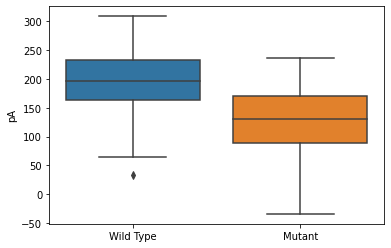

In [ ]:
## Make a Boxplot using sns.boxplot.  Label the y-axis 'pA' using plt.ylabel
sns.boxplot(data = df_N100)
plt.ylabel('pA')

Text(0, 0.5, 'pA')

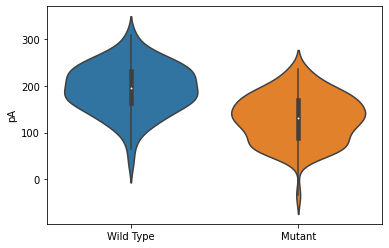

In [ ]:
## Make a Violin Plot using sns.violinplot.  Label the y-axis 'pA'.
sns.violinplot(data = df_N100)
plt.ylabel('pA')

Text(0.5, 0, 'pA')

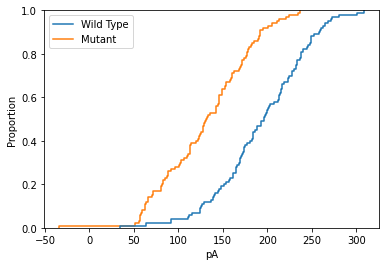

In [ ]:
## Make an Empirical CDF plot (ECDF plot) using sns.ecdfplot.  
sns.ecdfplot(data = df_N100)
# Which axis should be labeled 'pA'?
plt.xlabel('pA')

## EXERCISE 3. Confidence Intervals and Error Bars
**Descriptive statistics** are those that describe aspects of a sample (e.g., its mean, its standard deviation, the shape of its distribution).  In contrast, **inferential statistics** seeks to infer properites of an entire population from the sample distribution we collect. The sample estimates properties of the population but always with some uncertainty. Here you will learn how to calculate and plot measures of uncertainty like standard error of the mean (SEM) and confidence intervals (CI). 

DATASET.  For the following exercises, use the N=20 EPSC dataset.  These data are normally distributed.

###3.1.  Calculate mean, standard deviation, and SEM.
Use built-in Python functions to calculate the mean and standard deviation of the dataset.  Then calculate SEM from the standard deviation.  Do this for both wild type and mutant datasets, separately.

_Useful functions:  np.mean(), np.std(), np.sqrt(), np.size()_



In [ ]:
# Calculate the Mean, Sample Standard Deviation and Standard Error of the Mean For N = 20.
# Store these in meaningfully named variables like mean_wt and mean_mut, so you can access those values in subsequent code cells.
mean_n20_wt =  np.mean(df_N20['Wild Type'])
mean_n20_mu = np.mean(df_N20['Mutant'])
# Determine sample size 
size_n20_wt = np.size(df_N20['Wild Type'])
size_n20_mu = np.size(df_N20['Mutant'])
print(size_n20_wt, size_n20_mu)
# Calculate mean of wt data, and mean of mutant data
print(mean_n20_wt, mean_n20_mu)
# Calcuate sample standard devision for wt and mutant data
std_n20_wt =  np.std(df_N20['Wild Type'], ddof =1)
std_n20_mu = np.std(df_N20['Mutant'], ddof= 1)
print(std_n20_wt, std_n20_mu)
# Note: np.std(datasource, ddof=1)

# Calculate SEM for each data sample
sem_n20_wt =  std_n20_wt/np.sqrt(size_n20_wt)
sem_n20_mu =  std_n20_mu/np.sqrt(size_n20_mu)
print(sem_n20_wt, sem_n20_mu)

20 20
209.21180600268582 123.53001172542834
47.73482315842748 49.82004237588642
10.673830947617505 11.140100139440216


###3.2.  Calculate the 95% confidence interval for the mean.  
Hint: First find the critical value of t0.95 for this sample size.  Then use that plus the mean and SEM to calculate the upper and lower CI95 bounds.  Do this for both wild type and mutant datasets, separately.

_Useful functions:  within scipy.stats, t.ppf().  You can call it as follows:_



In [ ]:
## Calculate the 95% Confidence Intervals for the WT and Mutant For N = 20 

import scipy.stats as st     # we will use the library scipy.stats 

# First find the critical value of t0.95 for our sample size
# use t.ppf() as follows:
# t_score95 = st.t.ppf(0.95, deg_of_freedom)  # where deg_of_freedom = sample size N -1
wt_t_score95 = st.t.ppf(0.95, size_n20_wt - 1)
mu_t_score95 = st.t.ppf (0.95, size_n20_mu - 1)
# Second, calculate the bottom and top of the CI95 range
CI95_bottom_wt = mean_n20_wt - wt_t_score95 * sem_n20_wt
CI95_top_wt = mean_n20_wt  + wt_t_score95 * sem_n20_wt
CI95_bottom_mutant = mean_n20_mu - mu_t_score95 * sem_n20_mu
CI95_top_mutant = mean_n20_mu + mu_t_score95 * sem_n20_mu
print(CI95_bottom_wt, CI95_top_wt, CI95_bottom_mutant,CI95_top_mutant )


190.7553346865282 227.66827731884345 104.26729905068851 142.79272440016817


###3.3. Show your results in bar plots with error bars.
Using the variables you created above, make a bar plot showing mean+-s.d., mean+-SEM, and mean+-95CI.  Do this separately for WT and Mutant data.

Use the following model code for a nice plot, but fill in with the correct variables.

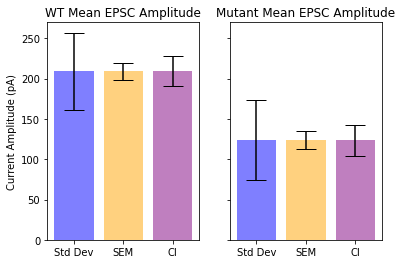

In [ ]:
# MODEL CODE SHOWING HOW TO GENERATE THE BAR PLOT.  This will create TWO 3-bar histograms,
# one for WT data (on ax1) and one for MUT data (on ax2).  Each histogram will show
# mean+- s.d., CI, and SEM (here it is just dummy data).

# GENERATE DUMMY DATA
dummy1 = mean_n20_wt
dummy2 = std_n20_wt
dummy3 = sem_n20_wt
dummy4 = wt_t_score95 * sem_n20_wt
TEST_wt_mean = [dummy1, dummy1, dummy1]
TEST_labels = ['Std Dev', 'SEM', 'CI']
TEST_wt_error = [dummy2, dummy3, dummy4]
TEST_mutant_mean = [mean_n20_mu, mean_n20_mu, mean_n20_mu]
TEST_mutant_error = [std_n20_mu, sem_n20_mu, mu_t_score95 * sem_n20_mu]

# PLOT DUMMY DATA
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.bar(np.arange(len(TEST_wt_mean)), TEST_wt_mean, yerr=TEST_wt_error, align='center', color = ['blue', 'orange', 'purple'], alpha=0.5, ecolor='black', capsize=10)
ax1.set_xticks(np.arange(len(TEST_wt_mean)))
ax1.set_xticklabels(TEST_labels)
ax1.set_ylabel('Current Amplitude (pA)')
ax1.set_title('WT Mean EPSC Amplitude')
ax2.bar(np.arange(len(TEST_mutant_mean)), TEST_mutant_mean, yerr=TEST_mutant_error, align='center', color = ['blue', 'orange', 'purple'], alpha=0.5, ecolor='black', capsize=10)
ax2.set_xticks(np.arange(len(TEST_wt_mean)))
ax2.set_xticklabels(TEST_labels)
ax2.set_title('Mutant Mean EPSC Amplitude');



In [ ]:
# Now use your REAL DATA to make your bar plot for WT and MUT data


###**Final Question.**  Why is the CI95 bar smaller than the standard deviation bar?  What different information are they providing?

###Note:  Built-in functions for 95%CI.
We calculated 95%CI "by hand" here.  But there are two built-in functions that will calculate a 95%CI error bar for you, and plot it on your graphs.  These are `sns.boxplot` and `sns.barplot`.  Note that they calculate 95%CI using bootstrapping, rather than the parameteric method. 

## EXERCISE 4. DEMO.  Two-sample t-test.


#Do two independent groups have different means, using 2-sample t-test. 
Imagine you compare how cortical PYR cell firing rate is affected by optogenetically inhibiting either PYR cells or PV interneurons.  To do this, you express halorhodopsin (Halo) in either PYR cells or PV interneurons, in separate groups of mice.  In each mouse, you measure PYR firing rate, and calculate a Halo Response Index as (light-on minus light-off firing rate).  You want to know whether the Halo Response Index is different between the PYR Halo dataset and the PV Halo dataset.

<img src='https://drive.google.com/uc?id=1RtRY4GVQpK75tsUFclQrsqQvY7rX4gTB'>

This demo shows how to examine the data, see that it is normally distributed, and run a 2-sample t-test to test if the two groups have different means.

In [ ]:
# Import the experimental data for PYR Halo and PV Halo groups.
halo_expt_url = 'https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/Hypothesis-Testing_Data/HaloExperimentData.csv'
df1 = pd.read_csv(halo_expt_url, usecols = ['PYR Halo', 'PV Halo'])
print(df1)

    PYR Halo  PV Halo
0      -1.38     3.38
1      -2.02     0.36
2      -4.10     2.61
3      -0.23     2.98
4      -2.12     0.71
5      -3.22     0.75
6      -1.51     1.89
7      -2.12     3.05
8      -1.64    -3.74
9      -1.36     0.79
10     -0.81     3.57
11     -2.07     5.12
12     -0.77     5.09
13     -1.80    -1.30
14     -2.19    -0.05


In [ ]:
# Examine data distributions
sns.displot(data=df1, binwidth = .5, kde = 'True', rug = 'True', multiple='stack')
plt.xlabel('Halo FR Effect (Hz)');

In [ ]:
# Are the data normally distributed?  If so, we can use a t-test.

# Do these groups have different means?  Run 2-sample, 2-tailed t-test.
import scipy.stats as st
st.ttest_ind(df1['PYR Halo'],df1['PV Halo'])   # alternative = ‘two-sided’, ‘less’, or ‘greater’ 


# Exercise 4.  Bootstrapping to test for difference between means

In this next example we will be looking at the firing rate of hippocampal neurons in mice exploring a cage that has no other mouse odor (no social context) or in which a mouse odor is present (social context). The question of interest is whether mean firing rate is different between these two contexts.


###4.1. Load the data. 

In [ ]:
## 1. Load in the social context experimental data
social_exp_url = 'https://raw.githubusercontent.com/neurogomez/HWNI_Bootcamp-CompStatsMaterial/main/Bootstrapping_Data/SocialExperimentData.csv' # add the url of interest as a string
df_socialexp = pd.read_csv(social_exp_url, usecols = ['NoSocial', 'Social'])
df_socialexp.head()

,NoSocial,Social
0,1.20,0.43
1,3.89,0.44
2,0.46,1.16
3,1.26,1.43
4,0.40,1.83


###4.2.  Plot the social and no-social data to see if they are normally distributed.

Text(0.5, 6.79999999999999, 'Firing Rate (Hz)')

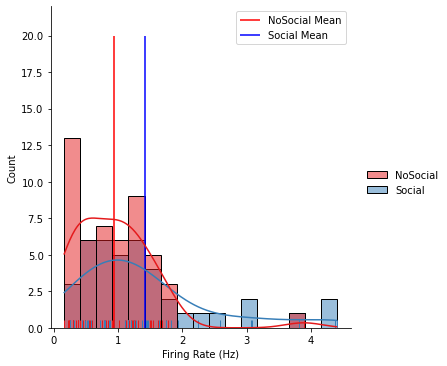

In [ ]:
# Plot histograms and PDFs of the Social vs Non-Social Context (use 0.25 Hz bins)
sns.displot(data=df_socialexp, binwidth = 0.25, kde = 'True', rug = 'True', multiple='stack', palette='Set1')
plt.vlines(np.mean(df_socialexp['NoSocial']), 0, 20, color = 'red', label = 'NoSocial Mean')
plt.vlines(np.mean(df_socialexp['Social']), 0, 20, color = 'blue', label = 'Social Mean')
plt.legend()
plt.xlabel('Firing Rate (Hz)')
# What is the mean of each group? 

###Question: Can we use a t-test to compare the means of these two samples?  Why or why not? 

###4.3.  Bootstrapping.  Our null hypothesis is that the two samples are random samples from the same parent distribution.  We will test whether our measured statistic (the difference of sample mean 1 - sample mean 2) is consistent with the null hypothesis.  
### STEPS.  We first create a combined distribution that represents the hypothesized parent distribution.  Then, we simulate the null hypothesis by drawing 2 random samples from that distribution, and calculating the difference of means for those two samples. This is repeated a large number of times (10,000) to generate a null distribution of our statistic.  Finally, we ask where our actual statistic falls on the null distribution--this gives us the p-value for our observation under the null hypothesis.


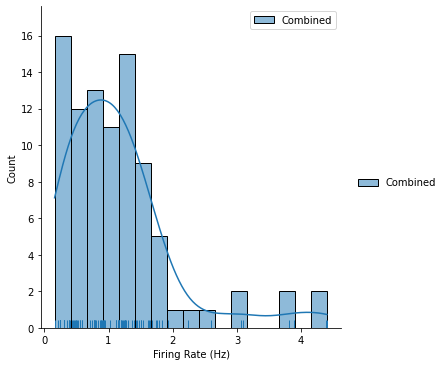

In [ ]:
## STEP 1. Generate the combined distribution.
df_combined = pd.DataFrame({'Combined':np.append(df_socialexp['NoSocial'], df_socialexp['Social'])}).dropna()
df_combined.head()

sns.displot(data=df_combined, binwidth = 0.25, kde = 'True', rug = 'True', color = 'purple', label = 'Combined')
plt.xlabel('Firing Rate (Hz)')
plt.legend()

In [ ]:
## STEP 2. Bootstrap function to generate the null distribution
## Fill in the missing code (...) to make this function work properly.
def boostrap_null_distribution(data_array, n1, n2, bs_iterations):
  """This function performs bootstrap sampling of the data in data_array.  On each iteration,
  it draws two random samples of size n1 and n2 from data_array, and calculates the difference 
  in means. It returns the full set of these simulated measurements, in an array of length
  bs_iterations.

  Input arguments:
    data_array (array): pass the df['Column Name']
    n1: number of samples to draw for sample 1
    n2: number of samples to draw for sample 2
    bs_iterations (integer): number of times to run the boostrapping test

  This function returns an array:
    null_distribution (array): the null distribution of difference of means
  """
  null_distribution = []
  for _ in range(bs_iterations):
    bs_sample1 = np.random.choice(data_array, size=n1)
    bs_sample2 = np.random.choice(data_array, size=n2)
    null_distribution = np.append(null_distribution, np.mean(bs_sample1) - np.mean(bs_sample2))
  return null_distribution 


Text(3.799999999999997, 0.5, 'Null Distribution')

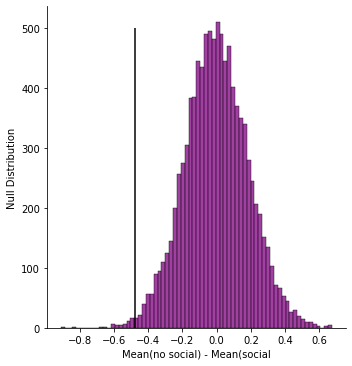

In [ ]:
## STEP 3. Call the bootstrap_null_distribution function to generate the null_distribution  
## Complete the code by filling in for (...)
null_dist = boostrap_null_distribution(df_combined['Combined'],40,50,10000)

## Plot the null distribution (use sns.displot)
sns.displot(null_dist, color = 'purple')

## Add a vertical line showing the actual difference of means in the measured samples (use plt.vlines and np.mean)
diff_mean = np.mean(df_socialexp['NoSocial']) - np.mean(df_socialexp['Social'])
plt.vlines(diff_mean, 0, 500, label = 'Observed value')

## Label the plot axes (use plt.xlabel and plt.ylabel)
plt.xlabel('Mean(no social) - Mean(social')
plt.ylabel('Null Distribution')

STEP 4.  Determine the p-value for observing the measured statistic under the null hypothesis.  
_Hint: Use the function [`stats.percentileofscore`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html) from the package [scipy](https://docs.scipy.org/doc/scipy/reference/)._



In [ ]:
## STEP 4. Calculate the p-value to quantify the likelihood of observing the measured data under the null hypothesis.
## Remember: You must consider whether our test is 1-tailed or 2-tailed.

pctile = stats.percentileofscore(null_dist,diff_mean)/100

# calculate p-value from percentile
# Because it is 2 tailed, double the percentile
p_value = pctile *2 

print(p_value)

0.011399999999999999


STEP 5.  If we are using $\alpha$ = 0.05, can we conclude that there is a significant difference in group means? 